In [ ]:
#importing libraries of python along woth the dataset
import numpy as np
import pandas as pd
#df = pd.read_csv ('LEUKEMIADATA.csv')
df = pd.read_csv ('burr leukema cases.csv')
df

,WBC,RBC,Hemoglobin,Hemotocrit,MCV,Plt_Count,Lymph_Count,Mo_Count,Neu_per,Lymp_Per,Bas_Per,Eo_Per,Mo_Per,Target
0,4.32,3.13,8.85,25.89,53.43,0.46,1.01,0.36,0.58,64.07,0.28,0.74,12.31,1
1,14.69,3.70,10.69,31.90,57.46,0.64,0.43,0.31,1.79,12.57,0.24,0.95,16.73,1
2,53.54,3.00,11.91,35.51,59.32,0.94,1.59,4.71,1.88,14.83,0.54,2.72,3.23,1
3,5.50,5.23,9.22,26.98,61.20,2.46,9.22,0.64,2.32,0.22,0.67,0.14,9.60,1
4,1.33,3.35,6.92,20.27,64.04,2.51,12.54,3.96,2.37,7.86,0.39,0.96,5.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2.88,3.44,11.60,35.70,88.20,227.00,1.34,0.46,16.20,60.00,0.80,1.50,20.80,1
1282,8.90,4.90,15.60,41.00,90.00,125.00,2.67,0.53,60.00,30.00,0.45,4.00,6.00,1
1283,3.10,4.20,8.20,33.00,68.00,54.00,0.31,0.19,80.00,10.00,0.61,4.00,6.00,1
1284,2.00,3.90,9.30,30.00,78.00,111.00,0.60,0.12,60.00,30.00,0.45,4.00,6.00,1


In [ ]:
#defing target varaible v and independant variable x
Y = df.Target                       
list = ['Target']
x = df.drop(list,axis = 1 )
x.head()

,WBC,RBC,Hemoglobin,Hemotocrit,MCV,Plt_Count,Lymph_Count,Mo_Count,Neu_per,Lymp_Per,Bas_Per,Eo_Per,Mo_Per
0,4.32,3.13,8.85,25.89,53.43,0.46,1.01,0.36,0.58,64.07,0.28,0.74,12.31
1,14.69,3.70,10.69,31.90,57.46,0.64,0.43,0.31,1.79,12.57,0.24,0.95,16.73
2,53.54,3.00,11.91,35.51,59.32,0.94,1.59,4.71,1.88,14.83,0.54,2.72,3.23
3,5.50,5.23,9.22,26.98,61.20,2.46,9.22,0.64,2.32,0.22,0.67,0.14,9.60
4,1.33,3.35,6.92,20.27,64.04,2.51,12.54,3.96,2.37,7.86,0.39,0.96,5.02


0.9585492227979274
 Accuracy 0.9585492227979274
0.9585492227979274
Negative value accuracy = 0.04145077720207254
0.041450777202072575
Sensitivity = 0.9502262443438914
specificity = 0.9696969696969697
False possitive rate = 0.030303030303030304
Precision = 0.9767441860465116
0.9767441860465116
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       165
           1       0.98      0.95      0.96       221

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386



<Axes: title={'center': 'Gradient Boosting Confusion Matrix'}>

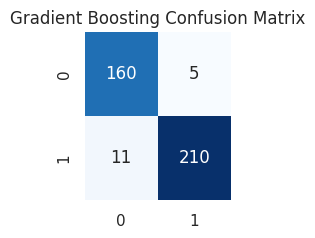

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3,random_state=42)
# import library for the gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# Define the model and fit to the training set
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, Y_train)


# Predict on the testing set
Y_pred = model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))

confusion = metrics.confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
#Acuuracy
print(" Accuracy", (TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(Y_test, Y_pred))
#negative value accuracy
print("Negative value accuracy =", (FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(Y_test, Y_pred))
#
#Sensitivity
print("Sensitivity =", TP / (TP + FN))

#specificity
print("specificity =", TN/(TN + FP))

#False possitive rate
print("False possitive rate =", FP / (TN + FP))

#Precision
print("Precision =", TP / (TP + FP))
print(metrics.precision_score(Y_test, Y_pred))

#Classification report
from sklearn.metrics import classification_report 
print(classification_report (Y_test,Y_pred))
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.subplot(2,3,3)
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(confusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 12})


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np


# Create a Gradient Boosting Classifier with default parameters
gb = GradientBoostingClassifier()

# Define the cross-validation fold generator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and calculate the mean accuracy score
scores = cross_val_score(gb, x, Y, cv=cv)
mean_score = np.mean(scores)

# Print the scores and mean score
print(f'Scores for each fold: {scores}')
print(f'Mean score: {mean_score:.4f}')


Scores for each fold: [0.96899225 0.98449612 0.98449612 0.97674419 1.         0.99224806
 0.9609375  0.9921875  0.9765625  0.9765625 ]
Mean score: 0.9813
